# Obtaining a list of equities tickers and the corresponding timeseries

In [13]:
! pip install --quiet yfinance ##--quiet mutes the package list as it’s installing

In [14]:
import os
import json
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import matplotlib.pyplot as plt


from datetime import datetime
''
# this workaround let's us override pandas_datareader with yfinance,
# although we can also use yfinance directly
import yfinance as yf
import pandas_datareader.data as web; yf.pdr_override()

In [15]:
start_date = '2023-03-02'
end_date  = '2023-03-21'

data_dir = '/data/'

#<font color="Grey">**A Timeline on the SVB Crash and why we chose it**

According to Investopedia, SVB Financial Group was removed from the S&P 500 Index due to the collapse its bank. So the most recent rebalancing of S&P 500 was announced on March 10, 2023.

The bank, mostly focused on venture capital funds and small tech startups had a huge boom during the pandemic. The bank then invested all of its profits into low-return bonds. However, after aggressive federal rate hikes the bonds quickly lost their value, causing panic. SVB no longer had the cash to give to the companies withdrawing their money and the FDIC took over the bank.


Initally the FDIC could only insure up to 250k but that wasn't enough, causing fear of a 2008 recession. The fed, treasury, and FDIC then announced a new emergency lending program so every company could get their money back.

##<font color = "green">**Timeseries Length** </font>
Originally, our team was going to do the entire month of march but, because there was a distinct end, it didn't seem necesarry to do the full month. We decided to do a week before SVB announced their losses and then around a week after the emergency lending program was announced.

##<font color = "#D80000"> **What other events did we consider?** </font>



Our team wanted to pick an event that had both positive and negative affects on the S&P500 companies and had a distinct beginning and end (within a reasonably small window).

We considered doing the pandemic but it was too long and the rise of ChatGPT but there were too many factors to consider (3.5 release, 4.0 release, 3.5 gets worse)
See article:

> See article: https://arxiv.org/pdf/2307.09009.pdf

In [16]:
names = ['','SVB announces 1.8 billion loss on bonds', 'SVB shares fall 60%, depositors withdraw money',
         'FDIC takes over SVB only insures up to 250k', 'Fed, Tresury, & FDIC say theyll cover all deposits',
         'Bank stocks bounced back in early trading','',
        ]

dates = ['2023-03-07','2023-03-08', '2023-03-09', '2023-03-10',
             '2023-03-12', '2023-03-14','2023-03-15'
        ]

    # Convert date strings (e.g. 2014-10-18) to datetime
    #import in above cell
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates] #strptime takes in date and format

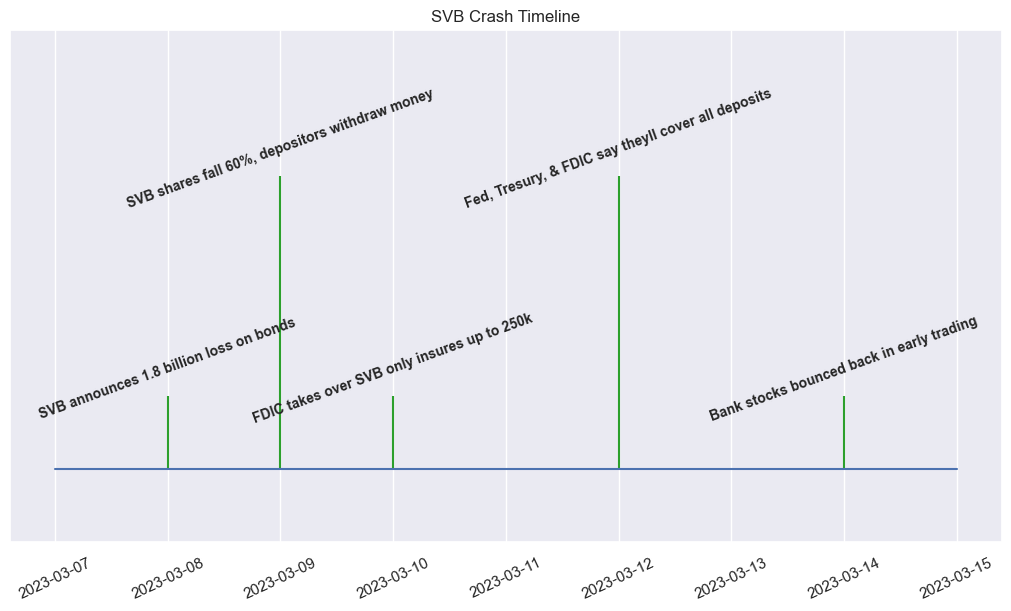

In [17]:
levels = np.tile([0, 1,4, 1, 4,1, 0], int(np.ceil(len(dates)/5)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
ax.set(title="SVB Crash Timeline")

ax.vlines(dates, 0, levels, color="tab:green")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates))  # Baseline and markers on it.



for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l), xytext=(0, 1* 20),# 0 means no horizontal offset and 1*20 means annotation will be 20 spaces from the end of the stem
                textcoords="offset points", horizontalalignment="center",
                verticalalignment="center", rotation=20, fontsize = 10, weight="bold")  # Rotate the text by 45 degrees

ax.set_ylim(-1, 6)
ax.yaxis.set_visible(False)
plt.xticks(rotation=25)
plt.show()

## Google trend search of the keyword "svb"

In [18]:
#svb_google = pd.read_csv('/content/sample_data/svb_google_trend.csv')

#import matplotlib.dates as mdates

In [19]:
'''
svb_google['Day'] = pd.to_datetime(svb_google['Day'])

# Filter the DataFrame to only include dates at a five-day interval
df_filtered = svb_google[svb_google['Day'].dt.day % 1 == 0]

x = df_filtered['Day']
y = df_filtered['SVB: (District of Columbia)']


# Create a DateFormatter object
date_formatter = mdates.DateFormatter('%m-%d')

# Set the DateFormatter as the major formatter for the x-axis
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.plot(x, y)

plt.xlabel('Date')
plt.ylabel('Interest Over Time')

plt.title('Interest over time of "SVB"')

plt.show()'''


'\nsvb_google[\'Day\'] = pd.to_datetime(svb_google[\'Day\'])\n\n# Filter the DataFrame to only include dates at a five-day interval\ndf_filtered = svb_google[svb_google[\'Day\'].dt.day % 1 == 0]\n\nx = df_filtered[\'Day\']\ny = df_filtered[\'SVB: (District of Columbia)\']\n\n\n# Create a DateFormatter object\ndate_formatter = mdates.DateFormatter(\'%m-%d\')\n\n# Set the DateFormatter as the major formatter for the x-axis\nplt.gca().xaxis.set_major_formatter(date_formatter)\n\nplt.plot(x, y)\n\nplt.xlabel(\'Date\')\nplt.ylabel(\'Interest Over Time\')\n\nplt.title(\'Interest over time of "SVB"\')\n\nplt.show()'

## <font color = "990099"> **Get list of companies in S&P500** </font>

Our team will obtain and store the list of the constituents from Wikipedia.

In [20]:
data    = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table_symbol   = data[0]
table_industry = data[0]['GICS Sector']
symbols = list(table_symbol.Symbol.values) ##companies
industries = list(table_industry.values) ##Industry Sector

symbols_industries_dict = {}
symbols_industries = data[0].iloc[:, [0,2]].values.tolist()
for pair in symbols_industries:
  keys, values = pair
  symbols_industries_dict[keys] = values

print("{} symbols in total".format(len(symbols)))
print("{} industries in total".format(len(industries)))
print(industries)


503 symbols in total
503 industries in total
['Industrials', 'Industrials', 'Health Care', 'Health Care', 'Information Technology', 'Consumer Staples', 'Information Technology', 'Industrials', 'Utilities', 'Financials', 'Health Care', 'Consumer Discretionary', 'Materials', 'Information Technology', 'Industrials', 'Materials', 'Real Estate', 'Health Care', 'Industrials', 'Utilities', 'Financials', 'Communication Services', 'Communication Services', 'Consumer Staples', 'Consumer Discretionary', 'Materials', 'Information Technology', 'Utilities', 'Industrials', 'Utilities', 'Financials', 'Financials', 'Real Estate', 'Utilities', 'Financials', 'Industrials', 'Health Care', 'Information Technology', 'Information Technology', 'Information Technology', 'Financials', 'Energy', 'Information Technology', 'Information Technology', 'Consumer Discretionary', 'Financials', 'Information Technology', 'Financials', 'Financials', 'Communication Services', 'Utilities', 'Information Technology', 'Consumer

## <font color = "6666FF"> **Download price timeseries** </font>

Now that we have a list of ticker symbols, we can download the corresponding timeseries from Yahoo Finance.

In [21]:
# Kassi said to get rid of this one because this is the index itself
#symbols.append('SPY')

In [22]:
dates = '_{}--{}'.format(start_date, end_date)
dates

'_2023-03-02--2023-03-21'

In [23]:
#!ls /data

**Load all the company data files:**

In [24]:
symbols = sorted(symbols)
print("Downloading {} files".format(len(symbols)))
for i, symbol in enumerate(symbols):
    try:
        df = web.get_data_yahoo(symbol, start_date, end_date,)
        # df = web.DataReader(symbol,'yahoo', start_date, end_date)
        df = df[['Adj Close','Volume']]
       # df.to_csv(os.path.join(data_dir, "{}.csv".format(symbol)))
    except KeyError:
      print("Error for {}".format(symbol))
      pass
print("Stored {} files".format(i+1))



[*********************100%%**********************]  1 of 1 completed


OSError: Cannot save file into a non-existent directory: '/data'

In [ ]:
# Printing a sample dataframe
idx = np.random.randint(len(symbols))
print("History for {}".format(symbols[idx]))
df = pd.read_csv(os.path.join(data_dir, symbols[idx]+".csv")).set_index('Date')
df.head()

History for CINF


,Adj Close,Volume
Date,,
2023-03-02,117.010460,412400
2023-03-03,118.488380,501400
2023-03-06,118.361145,630100
2023-03-07,115.336777,562400
2023-03-08,114.514633,648400


## <font color= "CC0099">**Pre-process Financial Timeseries:**

In [ ]:
index = pd.date_range(start=start_date, end=end_date, freq='D')     # initialize an empty DateTime Index and so each index is a date over the month
df_price = pd.DataFrame(index=index, columns=symbols)               # initialize empty dataframes
df_volume = pd.DataFrame(index=index, columns=symbols)

In [ ]:
# Aggregate all symbols into a price dataframe and volume dataframe
#for each ticker symbol get that csv file, set the index of that to the datetimes
#for each column in df_price is that company's adj price every datetime
for symbol in symbols:
    symbol_df = pd.read_csv(os.path.join(data_dir, symbol+".csv")).set_index('Date')
    symbol_df.index = pd.to_datetime(symbol_df.index)

    df_price[symbol] = symbol_df['Adj Close']
    df_volume[symbol] = symbol_df['Volume']

### <font color= "FF6600"> **Removing NaNs**

In [ ]:
# Let's drop the dates where all the stocks are NaNs, ie., weekends/holidays where no trading occured
df_price.dropna(how='all', inplace=True)
df_volume.dropna(how='all', inplace=True)
df_price.dropna(inplace=True, axis=1)
df_volume.dropna(inplace=True, axis=1)
assert((df_price.index == df_volume.index).all())

In [ ]:
True in pd.isna(df_price)

False

### <font color= "FF6600">**Storing the cleaned dataframes**

In [ ]:
#so instead of 500 csv files its now two
df_price.to_csv(os.path.join(data_dir, "prices.csv"), index_label='date')
df_volume.to_csv(os.path.join(data_dir, "volume.csv"))

#finds percent change between current price and prior
df_price_pct = df_price.pct_change()[1:]
df_price_pct.to_csv(os.path.join(data_dir, "prices_pct.csv"), index_label='date')
df_price_pct.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2023-03-03,0.015953,0.014888,0.035090,0.010882,0.027374,0.017734,0.005642,0.014853,0.031604,0.008993,...,0.021338,0.011812,0.012657,0.028132,0.016332,0.007693,0.026262,0.011076,0.019044,0.011745
2023-03-06,-0.004864,-0.014670,0.018539,-0.004998,0.004772,-0.016276,0.005610,0.001597,0.008662,-0.003919,...,-0.003712,-0.000768,0.008865,0.013681,-0.003368,-0.002853,-0.012676,-0.011763,-0.009547,-0.005218
2023-03-07,-0.020247,0.014888,-0.014496,-0.015134,0.004829,-0.026959,-0.009902,-0.020139,-0.006397,-0.003126,...,-0.019411,-0.022137,-0.019331,-0.017316,-0.013517,-0.018407,-0.011796,-0.011935,-0.047580,-0.015560
2023-03-08,0.004062,0.014059,0.008377,-0.021775,-0.015283,-0.005801,-0.009861,-0.002044,0.003016,0.008814,...,0.003358,0.012420,-0.014604,-0.016585,-0.003915,-0.001103,-0.010069,0.016250,0.005168,0.009639
2023-03-09,-0.013982,-0.042797,-0.014915,-0.015040,-0.041280,-0.015594,-0.027173,-0.014792,-0.021600,-0.016133,...,-0.034437,-0.002329,-0.007729,-0.022661,-0.012676,-0.005758,0.003609,-0.033087,-0.113967,-0.006819


In [ ]:
df_price.pct_change()[1:].to_csv(os.path.join(data_dir, 'prices_pct'+dates+'.csv'), index_label='date')
df_price.to_csv(os.path.join(data_dir, 'prices'+dates+'.csv'), index_label='date')

## <font color= "336699">**Obtain Percentage Change and Correlation**

We need to convert prices to percent change in price as opposed to the actual \$ price. This is because stocks with very similar prices can behave very differently and vice-versa.
For e.g., if a stock moves from \$100 to \$110, we want the price column to say 10% (indicating the change).

However, for volume, we will retain magnitude.

Spearman correlation

In [ ]:
df_price_pct = df_price.pct_change().dropna(how='all')
df_volume_pct = df_volume.pct_change().dropna(how='all')

### <font color= "336699">**Calculate Correlations**

In [ ]:
price_corr = df_price_pct.corr()
volume_corr = df_volume.corr()

In [ ]:
price_corr.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.518886,0.791644,0.374019,0.633633,0.810016,0.844037,0.907141,0.633081,0.872987,...,0.769745,0.302470,0.665963,0.743985,0.842872,0.723937,0.581283,0.822347,0.232826,0.829993
AAL,0.518886,1.000000,0.363977,-0.151065,0.736561,0.168846,0.642950,0.615691,0.609986,0.667913,...,0.739896,-0.394521,0.452224,0.273453,0.530967,0.064474,0.102183,0.648352,0.545734,0.338238
AAPL,0.791644,0.363977,1.000000,0.431610,0.610112,0.781189,0.553825,0.815992,0.691610,0.642085,...,0.712922,0.532878,0.515753,0.803461,0.644941,0.761709,0.446679,0.716757,0.305478,0.782667
ABBV,0.374019,-0.151065,0.431610,1.000000,0.339878,0.705050,0.322698,0.290110,0.224160,0.327988,...,0.359325,0.294439,0.311518,0.674332,0.404990,0.548515,0.709123,0.218784,0.018602,0.133277
ABNB,0.633633,0.736561,0.610112,0.339878,1.000000,0.482641,0.751249,0.783878,0.845854,0.700262,...,0.805316,-0.174715,0.398855,0.569476,0.545922,0.349104,0.265399,0.693478,0.571563,0.435598


In [ ]:
price_corr.loc['TEL'].sort_values(ascending= False)


TEL     1.000000
PNR     0.967170
OTIS    0.955945
MTD     0.955894
VICI    0.946274
          ...   
KR     -0.011053
CHRW   -0.101931
DG     -0.119878
NEM    -0.202646
CHD    -0.276399
Name: TEL, Length: 499, dtype: float64

In [ ]:
#sns.heatmap(volume_corr).set_title("Correlation heatmap for Volume")

Text(0.5, 1.0, 'Correlation heatmap for Price Changes')

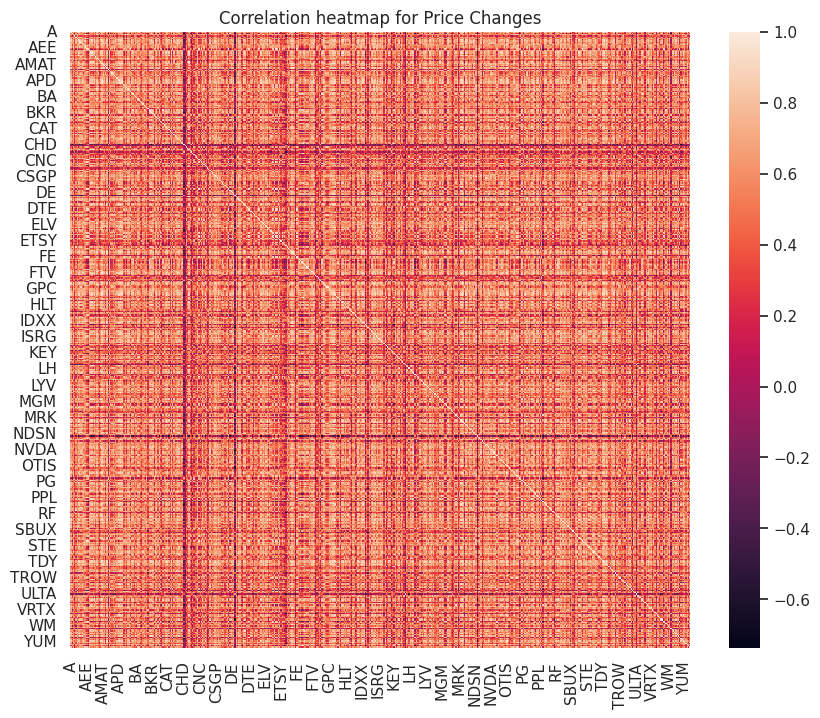

In [ ]:
sns.heatmap(price_corr).set_title("Correlation heatmap for Price Changes")

### <font color= "9900CC">**Examining correlations further**

In [ ]:
df_price_pct['JPM'].head()

2023-03-03    0.018360
2023-03-06   -0.005847
2023-03-07   -0.029408
2023-03-08   -0.005916
2023-03-09   -0.054136
Name: JPM, dtype: float64

Text(0, 0.5, 'GOLD SACH')

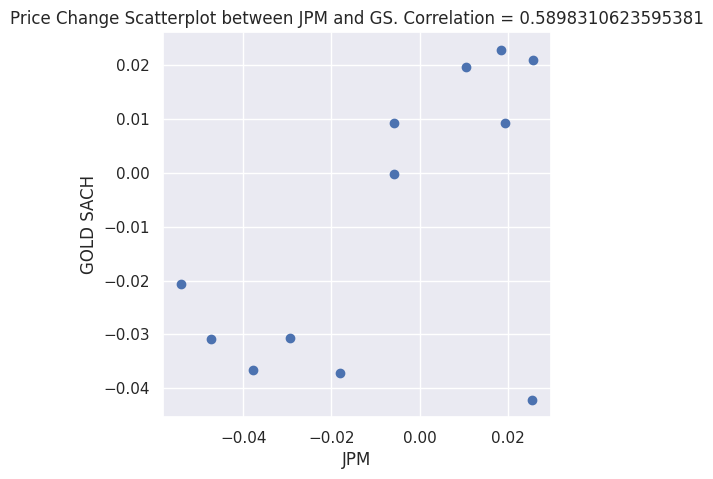

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df_price_pct['JPM'], df_price_pct['GS'])
plt.title('Price Change Scatterplot between JPM and GS. Correlation = {}'.format(price_corr['JPM']['GS']))

plt.xlabel("JPM")
plt.ylabel('GOLD SACH')

Summary statistics for the df_price_pct and df_volume dataframes and then boxplots to find outliers

In [ ]:
df_price_pct.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2023-03-03,0.015953,0.014888,0.035090,0.010882,0.027374,0.017734,0.005642,0.014853,0.031604,0.008993,...,0.021338,0.011812,0.012657,0.028132,0.016332,0.007693,0.026262,0.011076,0.019044,0.011745
2023-03-06,-0.004864,-0.014670,0.018539,-0.004998,0.004772,-0.016276,0.005610,0.001597,0.008662,-0.003919,...,-0.003712,-0.000768,0.008865,0.013681,-0.003368,-0.002853,-0.012676,-0.011763,-0.009547,-0.005218
2023-03-07,-0.020247,0.014888,-0.014496,-0.015134,0.004829,-0.026959,-0.009902,-0.020139,-0.006397,-0.003126,...,-0.019411,-0.022137,-0.019331,-0.017316,-0.013517,-0.018407,-0.011796,-0.011935,-0.047580,-0.015560
2023-03-08,0.004062,0.014059,0.008377,-0.021775,-0.015283,-0.005801,-0.009861,-0.002044,0.003016,0.008814,...,0.003358,0.012420,-0.014604,-0.016585,-0.003915,-0.001103,-0.010069,0.016250,0.005168,0.009639
2023-03-09,-0.013982,-0.042797,-0.014915,-0.015040,-0.041280,-0.015594,-0.027173,-0.014792,-0.021600,-0.016133,...,-0.034437,-0.002329,-0.007729,-0.022661,-0.012676,-0.005758,0.003609,-0.033087,-0.113967,-0.006819


# <font color= "9900CC">Summary Stats and Outliers?
The below box plot is showing the price percentage change averaged across all 500 companies for each day, there's no outliers so it doesn't seem like theres one day in the timeseries where all the companies are all having drastic movement.




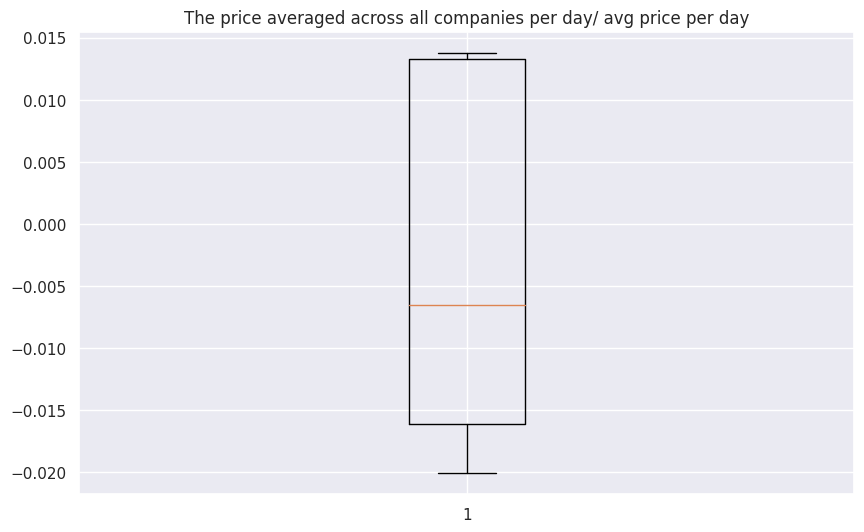

count    12.000000
mean     -0.003670
std       0.014243
min      -0.020042
25%      -0.016100
50%      -0.006495
75%       0.013309
max       0.013804
Name: average, dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
df_price_plotting = df_price_pct
ax.set(title="The price averaged across all companies per day/ avg price per day")
df_price_plotting['average'] = df_price_plotting.mean(axis=1)
#average across all companies per day



# Creating plot
plt.boxplot(df_price_plotting['average'])

# show plot
plt.show()
df_price_plotting['average'].describe()

In [ ]:

#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set(title="The volume averaged across all companies per day/ avg volume per day")
#df_volume_summary_stats = df_volume.describe()
#df_volume_summary_stats['average'] = df_volume_summary_stats.mean(axis=1)
#df_volume_summary_stats['average']


# Creating plot
#plt.boxplot(df_volume_summary_stats['average']) # plot the volume

# show plot
#plt.show()
#df_volume_summary_stats['average'].describe()

### Analyzng the distributions over time

This time instead of averaging every companies price change per day we're going to look at every company's price change over one day and make a separate boxplot to show the changes in distribution across the week of the crash

on march 2nd there was  3  negative outliers and  13 positive outliers in the distribution
on march 9th there was  21  negative outliers and  3 positive outliers in the distribution
on march 15th there was  9  negative outliers and  14 positive outliers in the distribution
on march 19th there was  10  negative outliers and  10 positive outliers in the distribution




[Text(0.5, 1.0, 'Price % changes on march 19th 2023')]

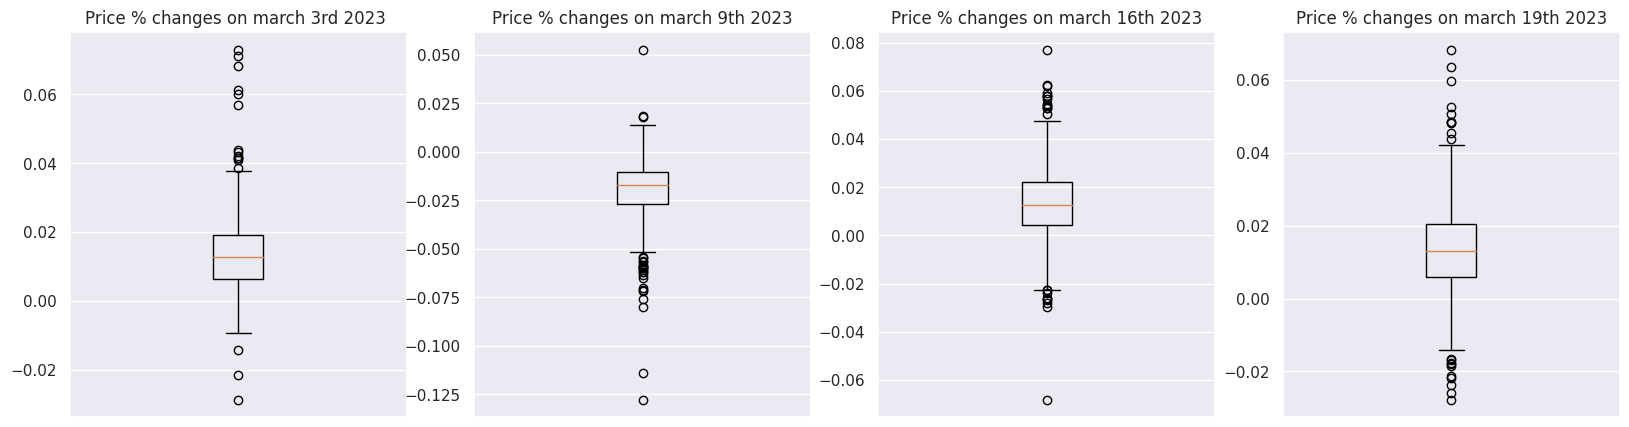

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(20, 5), ncols=4)
bxplt1 = ax1.boxplot(df_price_pct.loc['2023-03-03'])
bxplt2 = ax2.boxplot(df_price_pct.loc['2023-03-09'])
bxplt3 = ax3.boxplot(df_price_pct.loc['2023-03-16'])
bxplt4 = ax4.boxplot(df_price_pct.loc['2023-03-20'])
ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax3.xaxis.set_visible(False)
ax4.xaxis.set_visible(False)

outliers1 = bxplt1["fliers"][0].get_ydata()
outliers2 = bxplt2["fliers"][0].get_ydata()
outliers3 = bxplt3['fliers'][0].get_ydata()
outliers4 = bxplt4['fliers'][0].get_ydata()

neg_outliers1 = outliers1[outliers1<0]
neg_outliers2 = outliers2[outliers2<0]


print('on march 2nd there was ', len(neg_outliers1), ' negative outliers and ', len(outliers1[outliers1>0]), 'positive outliers in the distribution')
print('on march 9th there was ', len(neg_outliers2), ' negative outliers and ', len(outliers2[outliers2>0]), 'positive outliers in the distribution')
print('on march 15th there was ', len(outliers3[outliers3<0]), ' negative outliers and ', len(outliers3[outliers3>0]), 'positive outliers in the distribution')
print('on march 19th there was ', len(outliers4[outliers4<0]), ' negative outliers and ', len(outliers4[outliers4<0]), 'positive outliers in the distribution\n\n')

ax1.set(title="Price % changes on march 3rd 2023 ")
ax2.set(title="Price % changes on march 9th 2023")
ax3.set(title= "Price % changes on march 16th 2023")
ax4.set(title = "Price % changes on march 19th 2023")


This is also shown in the line graph showing how during the week of the crash, healthcare company ABT stayed consistent with the monthly trends while financial company charles schwab had one of its lowest price drops. Tesla, a silicon tech company had big drop on the 9th but rebounded pretty quickly

I wanted to show how the crash affects other sectors besides financial

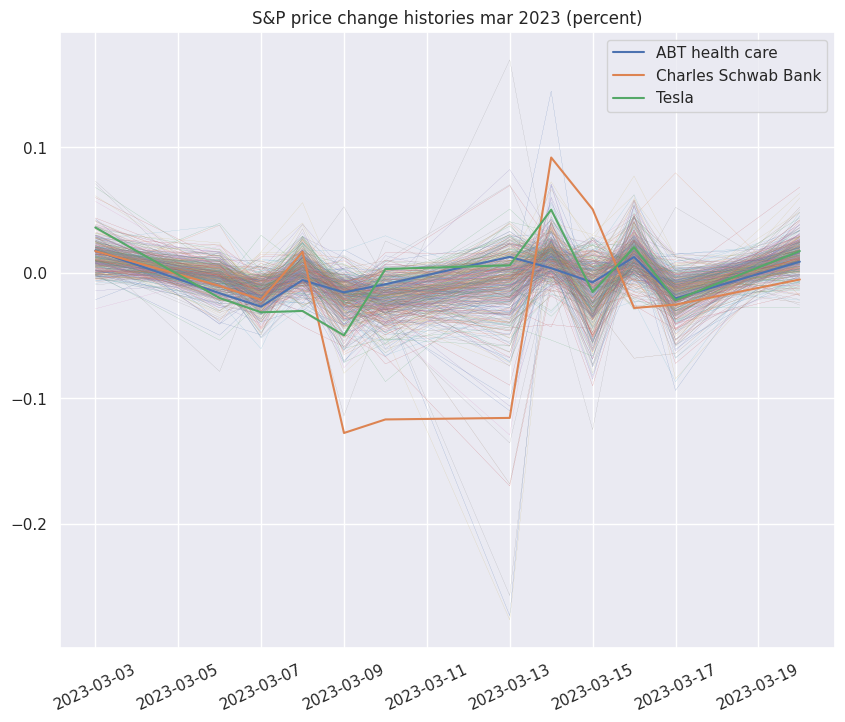

In [ ]:
plt.title('S&P price change histories mar 2023 (percent)')
plt.plot(df_price_pct, linewidth=0.10)
plt.plot(df_price_pct['ABT'], label='ABT health care', linewidth=1.5)
plt.plot(df_price_pct['SCHW'], label = 'Charles Schwab Bank', linewidth=1.5)
plt.plot(df_price_pct['TSLA'], label = 'Tesla', linewidth=1.5)
plt.xticks(rotation=25)
plt.legend()

## <font color= "9900CC">**Not every company reacted the same way**
In the original time series used for the file, JPMC and GS's price changes were consistent with each other throughout the month. However, when we set the timeseries to march 2023, during the week of the SVB crash they diverge drastically, this is because while GS suffered due to uncertaintiy w/ the economy, JPMC was in talks to accquire SVB thus their price sky rocketed so you can't definetively say every financial company suffered due to the crash.

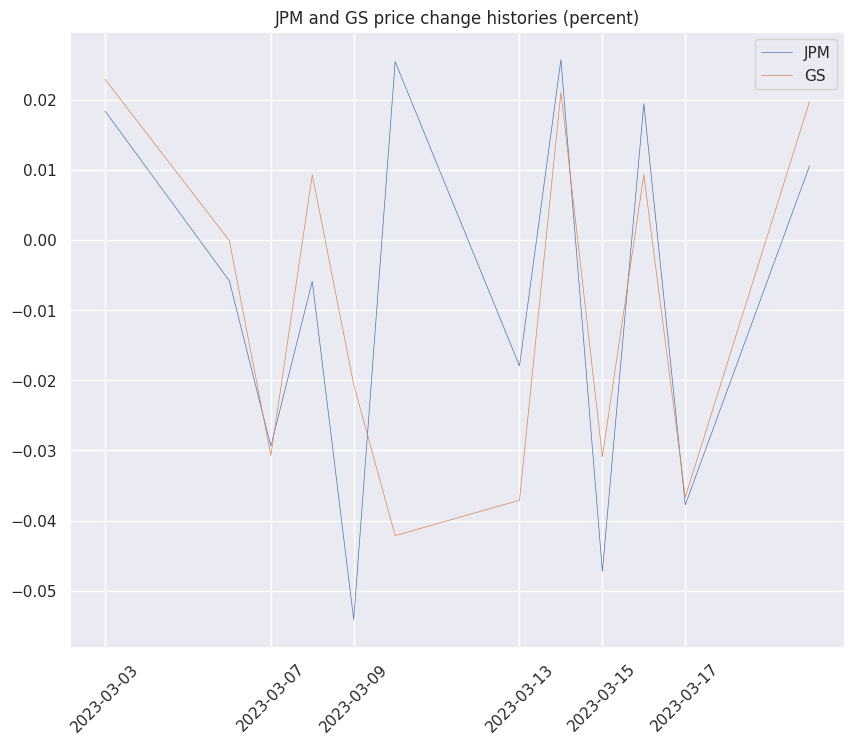

In [ ]:
plt.title('JPM and GS price change histories (percent)')
plt.plot(df_price_pct['JPM'], label='JPM', linewidth=0.5)
plt.plot(df_price_pct['GS'], label='GS', linewidth=0.5)
dates = list(df_price_pct.index.values)
plt.xticks([dates[i] for i in range(len(dates)) if i % 2 == 0], rotation=45)
plt.legend()

In [ ]:
df_price_pct_summary_stats = df_price_pct.describe()
df_price_pct_summary_stats['average'] = df_price_pct_summary_stats.mean(axis=1)
print('summary statistics for price (not pct change) averaged across all companies')
#df_price_pct_summary_stats.head()
print(df_price_pct_summary_stats['average'])

summary statistics for price (not pct change) averaged across all companies
count    12.000000
mean     -0.003670
std       0.020213
min      -0.037201
25%      -0.017019
50%      -0.003814
75%       0.009747
max       0.029107
Name: average, dtype: float64


## Saving correlation dataframes

In [ ]:
#df_price_pct.to_csv(os.path.join(data_dir, 'price_pct.csv'), index_label='date')
price_corr.to_csv(os.path.join(data_dir, 'price_corr.csv'), index_label='Symbol')
volume_corr.to_csv(os.path.join(data_dir, 'volume_corr.csv'))

In [ ]:
price_corr

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.518886,0.791644,0.374019,0.633633,0.810016,0.844037,0.907141,0.633081,0.872987,...,0.769745,0.302470,0.665963,0.743985,0.842872,0.723937,0.581283,0.822347,0.232826,0.829993
AAL,0.518886,1.000000,0.363977,-0.151065,0.736561,0.168846,0.642950,0.615691,0.609986,0.667913,...,0.739896,-0.394521,0.452224,0.273453,0.530967,0.064474,0.102183,0.648352,0.545734,0.338238
AAPL,0.791644,0.363977,1.000000,0.431610,0.610112,0.781189,0.553825,0.815992,0.691610,0.642085,...,0.712922,0.532878,0.515753,0.803461,0.644941,0.761709,0.446679,0.716757,0.305478,0.782667
ABBV,0.374019,-0.151065,0.431610,1.000000,0.339878,0.705050,0.322698,0.290110,0.224160,0.327988,...,0.359325,0.294439,0.311518,0.674332,0.404990,0.548515,0.709123,0.218784,0.018602,0.133277
ABNB,0.633633,0.736561,0.610112,0.339878,1.000000,0.482641,0.751249,0.783878,0.845854,0.700262,...,0.805316,-0.174715,0.398855,0.569476,0.545922,0.349104,0.265399,0.693478,0.571563,0.435598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.723937,0.064474,0.761709,0.548515,0.349104,0.813976,0.569089,0.692404,0.584596,0.590947,...,0.566738,0.628206,0.454163,0.549111,0.719979,1.000000,0.605334,0.703821,0.322231,0.755964
ZBH,0.581283,0.102183,0.446679,0.709123,0.265399,0.726602,0.468683,0.430973,0.231295,0.453411,...,0.488025,0.171738,0.605130,0.648115,0.712135,0.605334,1.000000,0.356337,0.145917,0.292403
ZBRA,0.822347,0.648352,0.716757,0.218784,0.693478,0.631933,0.762803,0.806577,0.801995,0.913041,...,0.848672,0.262202,0.384179,0.499869,0.725556,0.703821,0.356337,1.000000,0.571482,0.767484
ZION,0.232826,0.545734,0.305478,0.018602,0.571563,0.089372,0.484665,0.416105,0.626160,0.371718,...,0.636502,-0.284169,0.238859,0.086017,0.447630,0.322231,0.145917,0.571482,1.000000,0.086201


#From Correlation Matrix to Graph (NetworkX)
We're going to be using package networkX to convert the price correlation matrix to a graph structure
This first graph is static and is quite hard to read

In [ ]:
import networkx as nx
import plotly.graph_objects as go

In [ ]:
threshold = .95

links = price_corr.abs().stack().reset_index()
links.columns = ['company1', 'company2', 'correlation']
#made price_corr go from company names as the row and column indeces to company1 being the first column header, company2 beign the second, and correlation as the third

#filtering out any correlations under the threshold that we will set and getting rid of the self loops in the nodes
links_filtered=links.loc[ (links['correlation'] > threshold) & (links['company1'] != links['company2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'company1', 'company2', edge_attr = 'correlation')
nodes = list(G.nodes)
#df_company_names = pd.DataFrame(nodes, columns=['S&P Names'])
nx.set_node_attributes(G, symbols_industries_dict, 'GICS Sector')



###Adding weights to the edges

I'm going to make the **edge color on the graph be a darker blue if the correlation is higher between the nodes**

in the code above i set an edge attribute as 'correlation' now im iterating through the links_filtered to get two lists: edges (s,d) and weight (correlation)

in the code block below i set the edgelist to that edges list i just made and set the edge_color to the weights themselves, the colors and numbers map based on the edge c_map (color_map) called plt.cm.Blues

In [ ]:
edges = []
weights = []

# Iterate through the edges of the graph and extract 'correlation' as weights
#were making an edges list and a weights list
for edge in G.edges(data=True):
    source, target, weight = edge
    edges.append((source, target))
    weights.append(weight['correlation'])



G is the graph but now I'm playing with different ways to visualize it, the original briefing video mentioned making an interactive graph so i'm going to try that. below is the standard static graph that doesn't tell us much.  you can still tell which nodes are central and which are outliers relative to each other though.

##Making a custom node color map based on sector

In [ ]:
val_map = {
    'Materials': 'navy',
    'Consumer Staples': 'purple',
    'Energy': 'teal',
    'Real Estate': 'cyan',
    'Information Technology': 'dodgerblue',
    'Utilities': 'blue',
    'Health Care': 'indigo',
    'Industrials': 'royalblue',
    'Consumer Discretionary': 'skyblue',
    'Communication Services': 'midnightblue',
    'Financials': 'steelblue'
}

#list comprehension cool
node_colors = [val_map.get(G.nodes[node]['GICS Sector']) for node in G.nodes()]
print(node_colors)

['royalblue', 'royalblue', 'skyblue', 'skyblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'dodgerblue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'steelblue', 'midnightblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'royalblue', 'dodgerblue', 'royalblue', 'royalblue', 'royalblue', 'navy', 'royalblue', 'royalblue', 'navy', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'steelblue', 'steelblue', 'dodgerblue', 'dodgerblue', 'teal', 'royalblue', 'teal', 'teal', 'teal', 'navy', 'teal', 'teal', 'teal', 'dodgerblue', 'skyblue', 'royalblue', 'cyan', 'cyan', 'cyan', 'cyan', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'skyblue', 'royalblue', 'indigo', 'steelblue', 'royalblue', 'skyblue', 'royalblue', 'steelblue', 'teal', 'royalblue', 'navy', 'cyan', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'royalblue', 'royalblue', 'royalblue', 'blue', 'blue', 'blue', 'teal', 'royalblue', 'dodgerblue',

Drawing the network with the custom node color map and edge colormap

it should be noted that i cant make a colormap for the node colors (i could for edges tho)
the node colors have literally nothing to do with each other just if its the same color its the same industry

for the edge colors, if the edge is lighter, then the correlation is weaker

<ipython-input-42-3063d6825f0e>:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cmap)


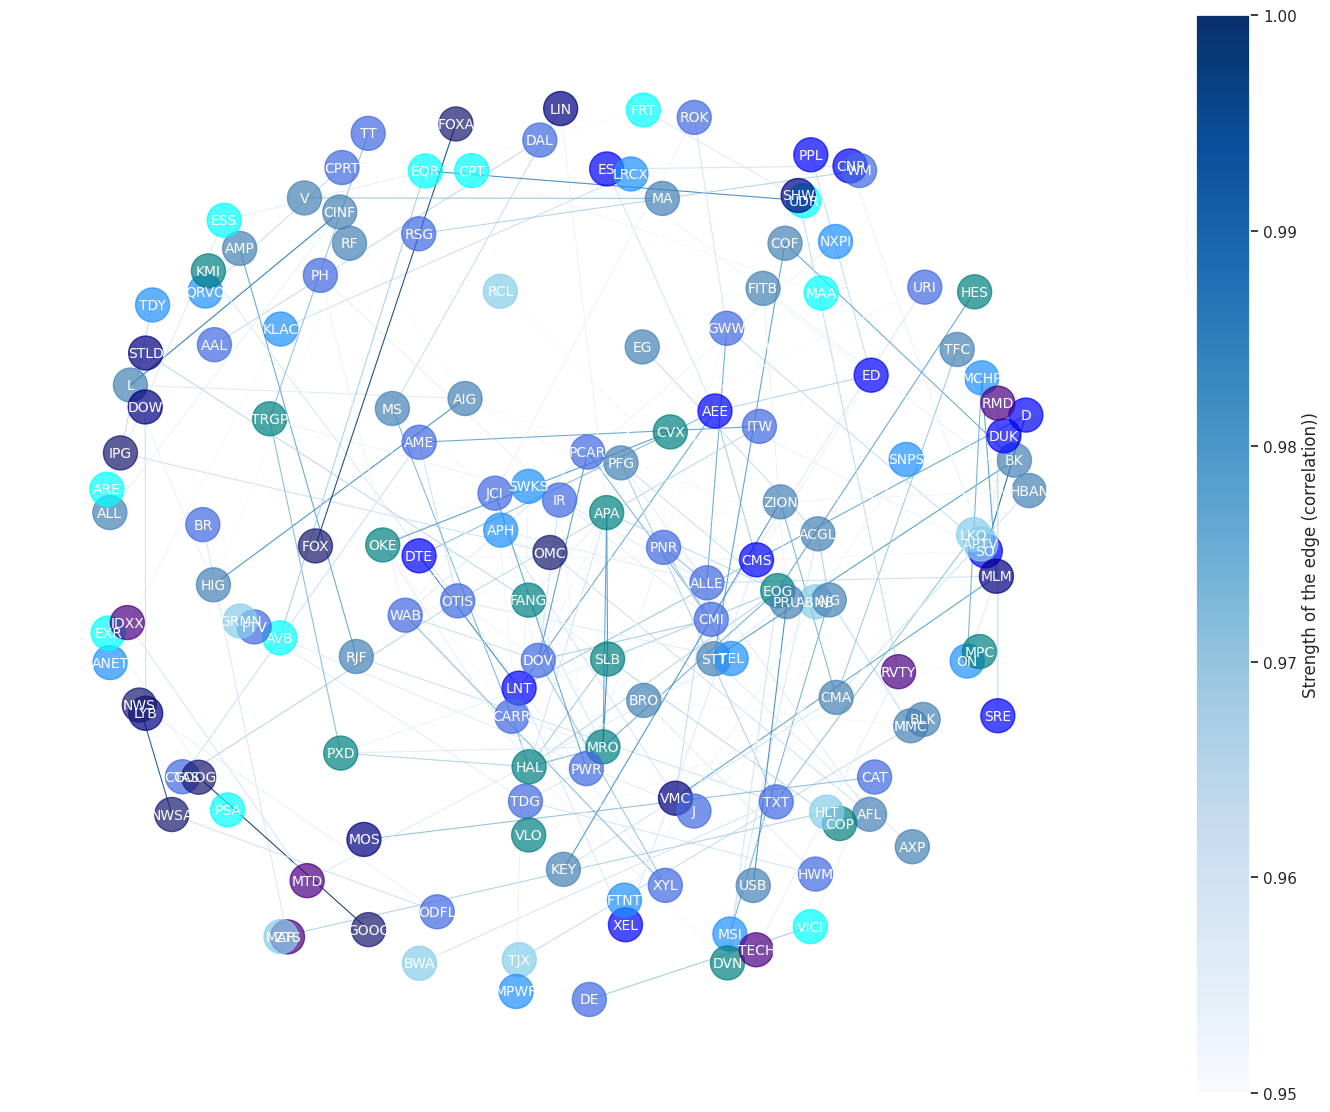

In [ ]:
from matplotlib import cm
plt.figure(figsize=(18, 14))


pos = nx.spring_layout(G, k=.7, seed =1234)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodes,
                       node_size=600,
                       node_color=node_colors,
                       alpha=.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = edges,
                       width=.8,
                       edge_color= weights,
                       edge_cmap = plt.cm.Blues,
                       alpha=0.9)


nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodes,nodes)),
                        font_color='white',
                        font_size = 10)

cmap = cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=threshold, vmax=1))
# Add colorbar directly to the plot
cbar = plt.colorbar(cmap)
cbar.set_label('Strength of the edge (correlation))')

plt.box(False)
plt.show()


# HEALTHCARE SECTOR GRAPH

In [ ]:
'''
from matplotlib import cm
plt.figure(figsize=(18, 14))


pos = nx.spring_layout(G, k=.7, seed =1234)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodes,
                       node_size=600,
                       node_color=node_colors,
                       alpha=.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = edges,
                       width=.8,
                       edge_color= weights,
                       edge_cmap = plt.cm.Blues,
                       alpha=0.9)


nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodes,nodes)),
                        font_color='white',
                        font_size = 10)

cmap = cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=threshold, vmax=1))
# Add colorbar directly to the plot
cbar = plt.colorbar(cmap)
cbar.set_label('Strength of the edge (correlation))')

plt.box(False)
plt.show()'''


"\nfrom matplotlib import cm\nplt.figure(figsize=(18, 14))\n\n\npos = nx.spring_layout(G, k=.7, seed =1234)\nnx.draw_networkx_nodes(G,pos,\n                       nodelist=nodes,\n                       node_size=600,\n                       node_color=node_colors,\n                       alpha=.7)\nnx.draw_networkx_edges(G,pos,\n                       edgelist = edges,\n                       width=.8,\n                       edge_color= weights,\n                       edge_cmap = plt.cm.Blues,\n                       alpha=0.9)\n\n\nnx.draw_networkx_labels(G, pos=pos,\n                        labels=dict(zip(nodes,nodes)),\n                        font_color='white',\n                        font_size = 10)\n\ncmap = cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=threshold, vmax=1))\n# Add colorbar directly to the plot\ncbar = plt.colorbar(cmap)\ncbar.set_label('Strength of the edge (correlation))')\n\nplt.box(False)\nplt.show()"

##Attempting to make an interactive graph
Most of the nodes are clustered around a central area, so thats why its important to make the graph interactive


<a href="https://python-graph-gallery.com/327-network-from-correlation-matrix/#:~:text=We%20have%20to%20transpose%20first%2C%20because%20the%20corr,network%3A%20nx.draw%28G%2C%20with_labels%3DTrue%2C%20node_color%3D%27orange%27%2C%20node_size%3D400%2C%20edge_color%3D%27black%27%2C%20linewidths%3D1%2C%20font_size%3D15%29"> static graph source</a>

<a href="https://plotly.com/python/network-graphs/">Interactive graph source plotly</a>

so for plotly to work there needs to be a location for each node and each edge, these can be defined as 'node attributes'

In [ ]:
pos = nx.spring_layout(G, seed=1234) #seed for reproducibility
nx.set_node_attributes(G, pos, 'pos')

###Making Node Hovertext
This loop is creating the text that shows when you hover over each edge, maybe ill do it for edges too idk

is also making node_adjacencies[], we need that to make the color of each node correspond to the number of nodes its connected to

In [ ]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(nodes[node]+' # of connections: '+str(len(adjacencies[1])))

##Edge Trace
So for plotly you cant just import a premade graph you have to trace over every node and edge and put into the plotly scatter plot

uses the spring layout positions to get the coordinates of the first node and second node in the edge to make the edge_x[] and edge_y[]

edge trace takes those arrays and traces them with a thin grey line

###Custom Color Map
for the edges you cant use a colorscale i think i need to do this manually

In [ ]:
import matplotlib.cm as cm
normalized_weights = (np.array(weights) - min(weights)) / (max(weights) - min(weights))
num_intervals = 10
colors = np.linspace(0, 1, num_intervals) #start stop intervals

In [ ]:
edge_traces = []

for i, edge in enumerate(G.edges()):
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    # set the color for the current edge based on the normalized weight
    #going to do rgb for the colors
    color_index = int(normalized_weights[i] * (num_intervals - 1))
    color_rgb = f"rgb({int(colors[color_index] * 255)}, {int(colors[color_index] * 255)}, {int(colors[color_index] * 255)}  )" #so because the three rgb values are equal its just going to be in greyscale lol
    edge_trace = go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        #hoverinfo='text',
        mode='lines',
        hoverinfo = 'text',
        line=dict(
            width=1.5,
            color=color_rgb,
        )
    )

    edge_traces.append(edge_trace)


##Node Trace
this is setting up the hovertext and the normal text (labels) for the nodes
you set the mode to markers+text to show the labels and the circles, if you do markers+text+lines itll show additional lines (edges) between nodes that dont make sense

in the marker attribute were setting up for the node's color to be depedent on the num of adjancecnies

custom node color map
these colors have nothing to do with each other !!!!!

In [ ]:
node_x = []
node_y = []

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    hoverinfo='text',
    text=list(G.nodes()),
    hovertext=node_text,
    textposition='top right',
    # textfont=dict(color='#E58606'),
    mode='markers+text',  # +lines
    marker=dict(
        color=node_colors,
        size=10,
        line_width=1
    ))

This is making the actual figure w title, axes etc

In [ ]:
fig = go.Figure(data=edge_traces + [node_trace],
             layout=go.Layout(
                title='<br>Correlation of S&P Companies based on Price Change',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

#Some variables to test for

Threshold variable - to free up some space on the graph

layout - currently we're using spring layout which treats nodes as repelling objects and edges and springs that hold them close so its kind of like community/centrality based groupings. we could also do spectral layout but that graph looked so weird omg


maybe do it so every edge shows but only the strongest edge is bolded and made red or something right?

<a href = "https://stackoverflow.com/questions/22967086/colouring-edges-by-weight-in-networkx"> coloring edges by weight stackoverflow</a>

<a href="https://www.tutorialspoint.com/colouring-the-edges-by-weight-in-networkx-matplotlib"> coloring edges by weight tutorial point</a>